# STACKED BARPLOT

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Rectangle

In [7]:
sosta = pd.read_excel("/Users/alfonsomarino/Desktop/sosta.xlsx")

## Import Fonts

In [9]:
font_path_bold = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_prop_bold = FontProperties(fname=font_path_bold)

font_path = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf' 
font_prop = FontProperties(fname=font_path)

## Visualization

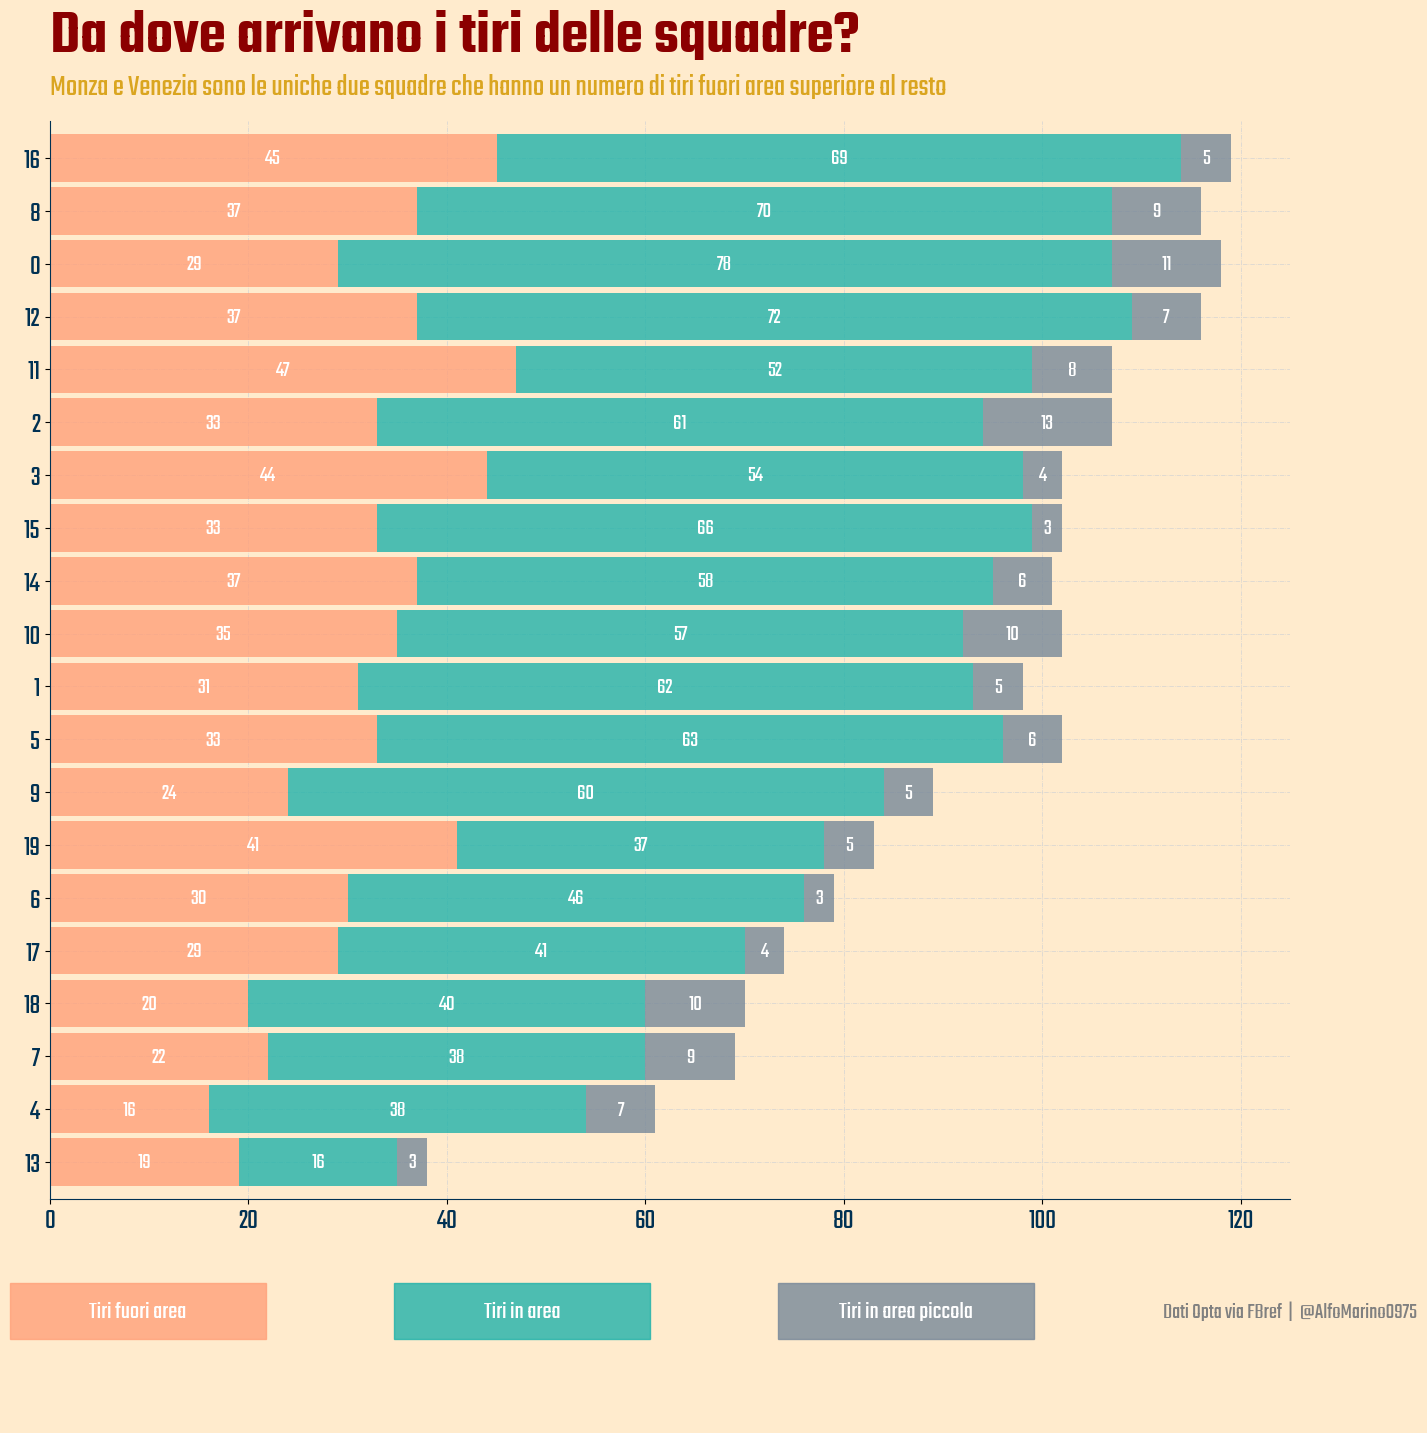

In [11]:
# Definition of categories for stacked bars (types of shots)
shot_categories = ['shotOboxTotal_shots', 'shotPenaltyArea_shots', 'shotSixYardBox_shots']

fig, ax1 = plt.subplots(figsize=(16, 14), facecolor='blanchedalmond')
plt.gca().set_facecolor('blanchedalmond')

sosta = sosta.sort_values(by='Tiri totali', ascending=True)

# Stack of the different types of shots
sosta[shot_categories].plot(kind='barh', stacked=True, ax=ax1, color=['#FFA07A', '#20B2AA', '#778899'], width = 0.9, alpha = 0.8, zorder = 2)

plt.title('Da dove arrivano i tiri delle squadre?', loc = "left", 
          fontproperties=font_prop_bold, fontsize = 45, color = "darkred", pad = 50)

plt.xticks(fontproperties=font_prop, fontsize=20, color = "#003153")
plt.yticks(fontproperties=font_prop, fontsize=20, color= "#003153")

# Add values on each block of the bar
for i in range(len(sosta)):
    cumulative_value = 0  # Initialize the cumulative value for each team
    for j in range(len(shot_categories)):
        value = sosta.iloc[i, sosta.columns.get_loc(shot_categories[j])]
        if value > 0:
            cumulative_value += value
            # Calculation of the central position for the value
            position = cumulative_value - value / 2
            ax1.text(position, i, f'{value:.0f}', va='center', ha='center', color='white', 
                     fontproperties=font_prop, fontsize=16)

ax1.get_legend().remove()

ax1.grid(True, color="lightgrey", linestyle='dashdot', linewidth=0.5)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#003153')
ax1.spines['bottom'].set_color('#003153')

ax1.set_ylabel('')


ax1.text(
    0,20.2, 
    "Monza e Venezia sono le uniche due squadre che hanno un numero di tiri fuori area superiore al resto",
    fontproperties=font_prop, color = "goldenrod", fontsize = 22
)


ax2 = fig.add_axes([0.1, -0.05, 0.8, 0.1])  # [left, bottom, width, height]

# Add rectangles
rect1 = Rectangle((0, 0.6), 0.2, 0.4, color='#FFA07A', transform=ax2.transAxes, clip_on=False, alpha = 0.8)
rect2 = Rectangle((0.3, 0.6), 0.2, 0.4, color='#20B2AA', transform=ax2.transAxes, clip_on=False, alpha = 0.8)
rect3 = Rectangle((0.6, 0.6), 0.2, 0.4, color='#778899', transform=ax2.transAxes, clip_on=False, alpha = 0.8)

ax2.add_patch(rect1)
ax2.add_patch(rect2)
ax2.add_patch(rect3)

# Add text in the rectangle
ax2.text(0.1, 0.8, 'Tiri fuori area', transform=ax2.transAxes, fontproperties=font_prop, fontsize=18, color='white', ha='center', va='center')
ax2.text(0.4, 0.8, 'Tiri in area', transform=ax2.transAxes, fontproperties=font_prop, fontsize=18, color='white', ha='center', va='center')
ax2.text(0.7, 0.8, 'Tiri in area piccola', transform=ax2.transAxes, fontproperties=font_prop, fontsize=18, color='white', ha='center', va='center')

fig.text(1, 0.8, "Dati Opta via FBref  |  @AlfoMarino0975", 
         transform=ax2.transAxes, fontproperties=font_prop, fontsize=16, ha='center', va='center', color = "grey")

ax2.axis('off')

# Salva il grafico
#plt.savefig('/Users/alfonsomarino/Desktop/grafico_tiri_squadre.png', dpi=300, bbox_inches='tight')


# Mostra il grafico
#fig.tight_layout()
plt.show()